In [10]:
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv('C:/Users/Srinivas/Downloads/Desktop/testdata/Test_Data.csv')

In [5]:
X = df.drop(['Class'],axis=1)
y = df.Class

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.7, random_state=500)

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.26423876265889706


In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.2822108719659766


In [19]:

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.7, random_state=1234)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_validation = sc_X.transform(X_validation)


C:\Users\Srinivas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Srinivas\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Srinivas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
Y_Pred = classifier.predict(X_validation)



In [27]:
Y_Pred

array(['F', 'E', 'E', ..., 'A', 'E', 'E'], dtype=object)

In [25]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, Y_Pred)

In [26]:
cm

array([[ 540,  140,   26,    0,   13,   20],
       [ 129,  663,    4,    1,   20,    6],
       [  13,   18, 1148,    1,   14,    0],
       [   5,    4,   13,   80,   37,    3],
       [  14,    5,   21,    6,  644,    7],
       [   1,    3,   36,    0,   23,  430]], dtype=int64)

In [38]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [63]:
probs = classifier.predict_proba(X_validation)

In [32]:
probs

array([[0.15 , 0.01 , 0.02 , 0.005, 0.005, 0.81 ],
       [0.17 , 0.055, 0.245, 0.085, 0.44 , 0.005],
       [0.165, 0.105, 0.025, 0.01 , 0.645, 0.05 ],
       ...,
       [0.445, 0.32 , 0.025, 0.   , 0.17 , 0.04 ],
       [0.175, 0.18 , 0.045, 0.005, 0.595, 0.   ],
       [0.16 , 0.2  , 0.11 , 0.07 , 0.46 , 0.   ]])

# plotting ROC curve

In [61]:
import scikitplot as skplt

C:\Users\Srinivas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


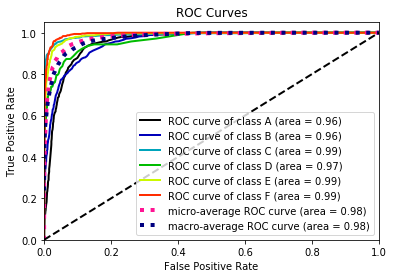

In [64]:
skplt.metrics.plot_roc_curve(y_validation, probs)
plt.show()

In [ ]:
ROC 

In [48]:

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

print("Random Forest Regression")
# assuming your already have a list of actual_class and predicted_class from the random forest regression 
lr_roc_auc_multiclass = roc_auc_score_multiclass(y_validation, probs)
print(lr_roc_auc_multiclass)

\Random Forest Regression
{'B': 0.5, 'E': 0.5, 'F': 0.5, 'C': 0.5, 'D': 0.5, 'A': 0.5}
